In [1]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
class LogisticRegression:
    def __init__(self):
        self.w = []
        self.b = 0
        
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def train(self, X, y, n_epoch=10000, learning_rate=0.1):
        m = X.shape[0]
        n_features = X.shape[1]
        losses = []
        
        # Randomize weights and bias
        w = np.array([random.random() for _ in range(n_features)])
        b = random.random()
        
        # Learn weights and bias iteratively
        for i in range(1, n_epoch+1):
            J, dw, db = 0, [0 for _ in range(n_features)], 0
            for x, _y in zip(X, y):
                z = x.dot(w) + b
                a = self.sigmoid(z)
                dw += (a - _y)*x
                db += (a - _y)
                
                if _y == 1:
                    J -= np.log(a)
                else:
                    J -= np.log(1-a)
            J /= m
            if i % 100 == 0:
                print('Epoch {} - {}'.format(i, J))
            losses.append(J)
            w -= learning_rate*dw/m
            b -= learning_rate*db/m
        
        # Save weights and bias
        self.w = w
        self.b = b
        
        return losses
    
    def predict(self, x):
        z = self.w.dot(x) + self.b
        a = self.sigmoid(z)
        return a

In [3]:
def draw_losses(losses):
    epochs = list(range(1, len(losses) + 1))
    
    plt.xlabel('epochs')
    plt.ylabel('cost function')
    plt.plot(epochs, losses)
    
    plt.show()

In [4]:
lr = LogisticRegression()

## AND Operator

|x1|x2|y|
|-:-|-:-|-:-|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

In [5]:
X_and = np.array([[0,0], [0,1], [1,0], [1,1]])
y_and = np.array([0, 0, 0, 1])

In [6]:
losses_and = lr.train(X_and, y_and)

Epoch 100 - 0.45797887437677204
Epoch 200 - 0.3599053321207636
Epoch 300 - 0.2993492315197428
Epoch 400 - 0.25764836087892395
Epoch 500 - 0.22678368727063347
Epoch 600 - 0.20279914413350814
Epoch 700 - 0.18351153694064087
Epoch 800 - 0.1676053540966752
Epoch 900 - 0.15423230318584025
Epoch 1000 - 0.14281583060770708
Epoch 1100 - 0.13294752755719697
Epoch 1200 - 0.12432836902905861
Epoch 1300 - 0.1167334533321526
Epoch 1400 - 0.10998982838305016
Epoch 1500 - 0.10396198877242581
Epoch 1600 - 0.09854206949589867
Epoch 1700 - 0.09364302485194019
Epoch 1800 - 0.08919376681374919
Epoch 1900 - 0.08513562606910519
Epoch 2000 - 0.08141972793772909
Epoch 2100 - 0.07800501481880202
Epoch 2200 - 0.07485673427508827
Epoch 2300 - 0.07194526817252181
Epoch 2400 - 0.06924521541894119
Epoch 2500 - 0.06673466584418665
Epoch 2600 - 0.06439461992102906
Epoch 2700 - 0.0622085210069203
Epoch 2800 - 0.0601618752844031
Epoch 2900 - 0.058241940692278504
Epoch 3000 - 0.05643747059671838
Epoch 3100 - 0.054738501

### 예측값

In [7]:
df_and = pd.DataFrame(X_and, columns=["x1", "x2"])
y_hat = list(map(lambda X: round(lr.predict(X), 3), X_and))
df_and['y'] = y_and.tolist()
df_and['predicted'] = y_hat
df_and

,x1,x2,y,predicted
0,0,0,0,0.000
1,0,1,0,0.020
2,1,0,0,0.020
3,1,1,1,0.972


### 비용 함수 변화량 

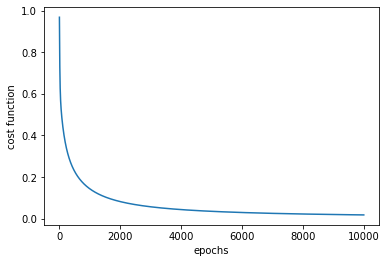

In [8]:
draw_losses(losses_and)

### Learning Rate 변화에 따른 비용 함수 변화량

In [9]:
# learning_rate = 0.1
losses1_and = lr.train(X_and, y_and)

# learning_rate = 0.2
losses2_and = lr.train(X_and, y_and, learning_rate=0.2)

# learning_rate = 0.05
losses3_and = lr.train(X_and, y_and, learning_rate=0.05)

Epoch 100 - 0.440651021547144
Epoch 200 - 0.3502275785772264
Epoch 300 - 0.2931744938668521
Epoch 400 - 0.25328740187260534
Epoch 500 - 0.22349091178193714
Epoch 600 - 0.20019943961362535
Epoch 700 - 0.18139414024580136
Epoch 800 - 0.16584103175088233
Epoch 900 - 0.15273630213346756
Epoch 1000 - 0.14152962875806022
Epoch 1100 - 0.13182906892967788
Epoch 1200 - 0.12334646350904312
Epoch 1300 - 0.11586437511469633
Epoch 1400 - 0.10921514969142107
Epoch 1500 - 0.1032671450914886
Epoch 1600 - 0.0979153776929719
Epoch 1700 - 0.09307499244237785
Epoch 1800 - 0.08867659449211125
Epoch 1900 - 0.08466284211148445
Epoch 2000 - 0.08098591475113046
Epoch 2100 - 0.0776056012302081
Epoch 2200 - 0.07448783558428569
Epoch 2300 - 0.07160356147358163
Epoch 2400 - 0.0689278413422027
Epoch 2500 - 0.06643915034829861
Epoch 2600 - 0.06411881147961962
Epoch 2700 - 0.061950539741640956
Epoch 2800 - 0.05992007145881692
Epoch 2900 - 0.05801486060618474
Epoch 3000 - 0.05622382837920574
Epoch 3100 - 0.05453715537

Epoch 4900 - 0.06846342918991592
Epoch 5000 - 0.06721337320670437
Epoch 5100 - 0.06600677498652875
Epoch 5200 - 0.06484144080874245
Epoch 5300 - 0.06371532118953582
Epoch 5400 - 0.06262649923169492
Epoch 5500 - 0.061573180088861354
Epoch 5600 - 0.06055368142115557
Epoch 5700 - 0.059566424734452686
Epoch 5800 - 0.0586099275088582
Epoch 5900 - 0.05768279603337813
Epoch 6000 - 0.05678371887366444
Epoch 6100 - 0.05591146090829707
Epoch 6200 - 0.055064857876513024
Epoch 6300 - 0.054242811386787285
Epoch 6400 - 0.053444284341337064
Epoch 6500 - 0.05266829673657964
Epoch 6600 - 0.05191392180392329
Epoch 6700 - 0.05118028245908861
Epoch 6800 - 0.05046654803152548
Epoch 6900 - 0.049771931248450516
Epoch 7000 - 0.04909568545065583
Epoch 7100 - 0.04843710201956049
Epoch 7200 - 0.047795507997027975
Epoch 7300 - 0.04717026388130774
Epoch 7400 - 0.046560761584079825
Epoch 7500 - 0.04596642253503008
Epoch 7600 - 0.04538669592168151
Epoch 7700 - 0.044821057053356414
Epoch 7800 - 0.04426900583918275
Ep

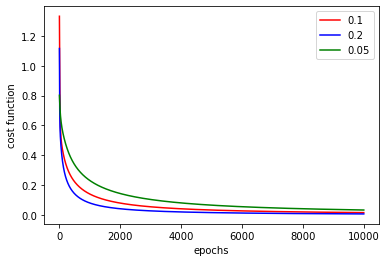

In [10]:
epochs = list(range(1, len(losses1_and) + 1))

plt.xlabel('epochs')
plt.ylabel('cost function')
plt.plot(epochs, losses1_and, color='red', label='0.1')
plt.plot(epochs, losses2_and, color='blue', label='0.2')
plt.plot(epochs, losses3_and, color='green', label='0.05')
plt.legend()

plt.show()

## OR Operator

|x1|x2|y|
|-:-|-:-|-:-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

In [11]:
X_or = np.array([[0,0], [0,1], [1,0], [1,1]])
y_or = np.array([0, 1, 1, 1])

In [12]:
losses_or = lr.train(X_or, y_or)

Epoch 100 - 0.34203474552160007
Epoch 200 - 0.26716653850179345
Epoch 300 - 0.21755358824095988
Epoch 400 - 0.1826470834996044
Epoch 500 - 0.15687661814578446
Epoch 600 - 0.13713508640644467
Epoch 700 - 0.12157002356003971
Epoch 800 - 0.10901137355273523
Epoch 900 - 0.09868466592034449
Epoch 1000 - 0.09005744581851412
Epoch 1100 - 0.08275204124906514
Epoch 1200 - 0.07649347441751982
Epoch 1300 - 0.071077031846383
Epoch 1400 - 0.0663473513298996
Epoch 1500 - 0.06218452575262424
Epoch 1600 - 0.05849462777708409
Epoch 1700 - 0.05520310160393679
Epoch 1800 - 0.052250061670042945
Epoch 1900 - 0.04958688823518445
Epoch 2000 - 0.04717372261146682
Epoch 2100 - 0.044977597651655855
Epoch 2200 - 0.04297102406136202
Epoch 2300 - 0.04113090858415727
Epoch 2400 - 0.03943771705186757
Epoch 2500 - 0.037874820323482106
Epoch 2600 - 0.03642797836874618
Epoch 2700 - 0.03508492979099589
Epoch 2800 - 0.03383506260780429
Epoch 2900 - 0.032669148219255296
Epoch 3000 - 0.031579124926066855
Epoch 3100 - 0.030

### 예측값

In [13]:
df_or = pd.DataFrame(X_or, columns=["x1", "x2"])
y_hat = list(map(lambda X: round(lr.predict(X), 3), X_or))
df_or['y'] = y_or.tolist()
df_or['predicted'] = y_hat
df_or

,x1,x2,y,predicted
0,0,0,0,0.021
1,0,1,1,0.992
2,1,0,1,0.992
3,1,1,1,1.000


### 비용함수 변화량

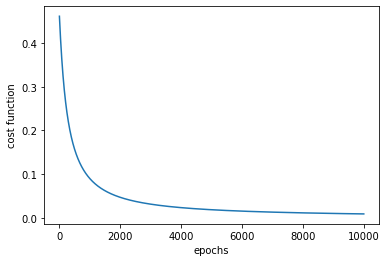

In [14]:
draw_losses(losses_or)

### Learning Rate 변화에 따른 비용 함수 변화량

In [15]:
# learning_rate = 0.1
losses1_or = lr.train(X_or, y_or)

# learning_rate = 0.2
losses2_or = lr.train(X_or, y_or, learning_rate=0.2)

# learning_rate = 0.05
losses3_or = lr.train(X_or, y_or, learning_rate=0.05)

Epoch 100 - 0.3148896320197907
Epoch 200 - 0.24953084893705454
Epoch 300 - 0.20534865409044967
Epoch 400 - 0.17375001510019805
Epoch 500 - 0.15012809506810093
Epoch 600 - 0.13185634177400002
Epoch 700 - 0.11733860855233401
Epoch 800 - 0.10555100246962791
Epoch 900 - 0.0958072682919097
Epoch 1000 - 0.08763073596058524
Epoch 1100 - 0.08068039363088786
Epoch 1200 - 0.0747061421780835
Epoch 1300 - 0.06952061799326684
Epoch 1400 - 0.0649808454445407
Epoch 1500 - 0.060975943182747086
Epoch 1600 - 0.05741868023385323
Epoch 1700 - 0.05423954914608115
Epoch 1800 - 0.051382525290957576
Epoch 1900 - 0.04880198021957432
Epoch 2000 - 0.04646040015909754
Epoch 2100 - 0.044326675973843904
Epoch 2200 - 0.04237480509836159
Epoch 2300 - 0.04058289470057448
Epoch 2400 - 0.03893238797400882
Epoch 2500 - 0.037407457687079614
Epoch 2600 - 0.03599452649241814
Epoch 2700 - 0.034681884286306044
Epoch 2800 - 0.03345938057666888
Epoch 2900 - 0.03231817533624574
Epoch 3000 - 0.031250535833595904
Epoch 3100 - 0.03

Epoch 5100 - 0.036597302210752386
Epoch 5200 - 0.03590741761381119
Epoch 5300 - 0.03524240223944976
Epoch 5400 - 0.03460095705963897
Epoch 5500 - 0.03398187090607541
Epoch 5600 - 0.0333840132325779
Epoch 5700 - 0.032806327576246984
Epoch 5800 - 0.03224782564037615
Epoch 5900 - 0.03170758193161209
Epoch 6000 - 0.03118472889206694
Epoch 6100 - 0.03067845247419465
Epoch 6200 - 0.030187988112409598
Epoch 6300 - 0.029712617050789068
Epoch 6400 - 0.029251662990870807
Epoch 6500 - 0.028804489027637888
Epoch 6600 - 0.02837049484534909
Epoch 6700 - 0.0279491141480011
Epoch 6800 - 0.027539812301954715
Epoch 6900 - 0.027142084170671238
Epoch 7000 - 0.026755452123632822
Epoch 7100 - 0.02637946420340109
Epoch 7200 - 0.026013692436424547
Epoch 7300 - 0.025657731274681104
Epoch 7400 - 0.025311196156540407
Epoch 7500 - 0.024973722176393157
Epoch 7600 - 0.024644962853622616
Epoch 7700 - 0.024324588992413142
Epoch 7800 - 0.02401228762470681
Epoch 7900 - 0.023707761029355193
Epoch 8000 - 0.02341072582116

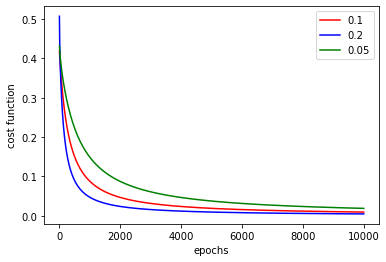

In [16]:
epochs = list(range(1, len(losses1_or) + 1))

plt.xlabel('epochs')
plt.ylabel('cost function')
plt.plot(epochs, losses1_or, color='red', label='0.1')
plt.plot(epochs, losses2_or, color='blue', label='0.2')
plt.plot(epochs, losses3_or, color='green', label='0.05')
plt.legend()

plt.show()

## XOR Operator

|x1|x2|y|
|-:-|-:-|-:-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

In [17]:
X_xor = np.array([[0,0], [0,1], [1,0], [1,1]])
y_xor = np.array([0, 1, 1, 0])

In [18]:
losses_xor = lr.train(X_xor, y_xor)

Epoch 100 - 0.7002761831895464
Epoch 200 - 0.6962414486339571
Epoch 300 - 0.6945166784327633
Epoch 400 - 0.6937592773330241
Epoch 500 - 0.6934225947271548
Epoch 600 - 0.6932716556805981
Epoch 700 - 0.693203600933306
Epoch 800 - 0.6931728016675337
Epoch 900 - 0.6931588292078916
Epoch 1000 - 0.6931524806124538
Epoch 1100 - 0.693149593193871
Epoch 1200 - 0.6931482791429445
Epoch 1300 - 0.6931476808895518
Epoch 1400 - 0.6931474084529388
Epoch 1500 - 0.6931472843696684
Epoch 1600 - 0.6931472278495134
Epoch 1700 - 0.6931472021029046
Epoch 1800 - 0.69314719037411
Epoch 1900 - 0.6931471850309622
Epoch 2000 - 0.6931471825968111
Epoch 2100 - 0.6931471814878867
Epoch 2200 - 0.6931471809826916
Epoch 2300 - 0.693147180752538
Epoch 2400 - 0.6931471806476859
Epoch 2500 - 0.6931471805999179
Epoch 2600 - 0.6931471805781559
Epoch 2700 - 0.6931471805682416
Epoch 2800 - 0.6931471805637249
Epoch 2900 - 0.6931471805616672
Epoch 3000 - 0.6931471805607298
Epoch 3100 - 0.6931471805603027
Epoch 3200 - 0.6931471

### 예측값

In [19]:
df_xor = pd.DataFrame(X_xor, columns=["x1", "x2"])
y_hat = list(map(lambda X: round(lr.predict(X), 3), X_xor))
df_xor['y'] = y_xor.tolist()
df_xor['predicted'] = y_hat
df_xor

,x1,x2,y,predicted
0,0,0,0,0.5
1,0,1,1,0.5
2,1,0,1,0.5
3,1,1,0,0.5


### 비용함수 변화량

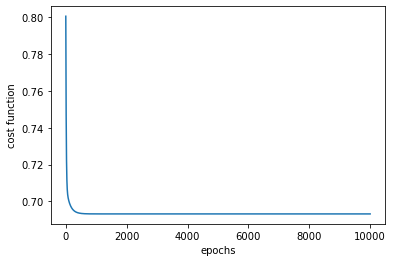

In [20]:
draw_losses(losses_xor)

### Learning Rate 변화에 따른 비용 함수 변화량

In [21]:
# learning_rate = 0.1
losses1_xor = lr.train(X_xor, y_xor)

# learning_rate = 0.2
losses2_xor = lr.train(X_xor, y_xor, learning_rate=0.2)

# learning_rate = 0.05
losses3_xor = lr.train(X_xor, y_xor, learning_rate=0.05)

Epoch 100 - 0.6943247680804527
Epoch 200 - 0.6934744869537321
Epoch 300 - 0.6932461233817218
Epoch 400 - 0.6931779281294128
Epoch 500 - 0.6931570982071666
Epoch 600 - 0.6931505314323085
Epoch 700 - 0.693148373981551
Epoch 800 - 0.6931476291766412
Epoch 900 - 0.6931473578054006
Epoch 1000 - 0.6931472535652818
Epoch 1100 - 0.6931472116095884
Epoch 1200 - 0.6931471940747727
Epoch 1300 - 0.6931471865370031
Epoch 1400 - 0.6931471832315893
Epoch 1500 - 0.6931471817624254
Epoch 1600 - 0.6931471811035838
Epoch 1700 - 0.6931471808064205
Epoch 1800 - 0.6931471806718928
Epoch 1900 - 0.6931471806108488
Epoch 2000 - 0.6931471805831081
Epoch 2100 - 0.6931471805704897
Epoch 2200 - 0.6931471805647468
Epoch 2300 - 0.6931471805621321
Epoch 2400 - 0.6931471805609414
Epoch 2500 - 0.693147180560399
Epoch 2600 - 0.693147180560152
Epoch 2700 - 0.6931471805600395
Epoch 2800 - 0.6931471805599883
Epoch 2900 - 0.6931471805599648
Epoch 3000 - 0.6931471805599543
Epoch 3100 - 0.6931471805599494
Epoch 3200 - 0.69314

Epoch 8200 - 0.6931471805599454
Epoch 8300 - 0.6931471805599453
Epoch 8400 - 0.6931471805599453
Epoch 8500 - 0.6931471805599452
Epoch 8600 - 0.6931471805599452
Epoch 8700 - 0.6931471805599452
Epoch 8800 - 0.6931471805599453
Epoch 8900 - 0.6931471805599452
Epoch 9000 - 0.6931471805599453
Epoch 9100 - 0.6931471805599452
Epoch 9200 - 0.6931471805599453
Epoch 9300 - 0.6931471805599453
Epoch 9400 - 0.6931471805599452
Epoch 9500 - 0.6931471805599452
Epoch 9600 - 0.6931471805599453
Epoch 9700 - 0.6931471805599453
Epoch 9800 - 0.6931471805599454
Epoch 9900 - 0.6931471805599453
Epoch 10000 - 0.6931471805599453


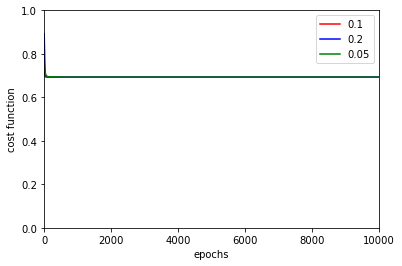

In [22]:
epochs = list(range(1, len(losses1_xor) + 1))

plt.xlabel('epochs')
plt.ylabel('cost function')
plt.plot(epochs, losses1_xor, color='red', label='0.1')
plt.plot(epochs, losses2_xor, color='blue', label='0.2')
plt.plot(epochs, losses3_xor, color='green', label='0.05')
plt.axis([0, 10000, 0, 1])
plt.legend()

plt.show()